In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("C:\\Users\\ma007\\Downloads\\Q1_property.csv", delimiter=";")
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN


#Province Selected = Punjab

#Data Pre-Processing

In [4]:

print(df.dtypes)


property_id        int64
location_id        int64
page_url          object
property_type     object
price              int64
location          object
city              object
province_name     object
latitude         float64
longitude        float64
baths              int64
area              object
purpose           object
bedrooms           int64
date_added        object
agency            object
agent             object
dtype: object


In [5]:

columns_to_drop = ['latitude', 'longitude', 'agency','page_url','bedrooms','city','agent','province_name']
df = df.drop(columns=columns_to_drop)


In [6]:

df['area'] = pd.to_numeric(df['area'], errors='coerce')


In [7]:
print (df.dtypes)

property_id        int64
location_id        int64
property_type     object
price              int64
location          object
baths              int64
area             float64
purpose           object
date_added        object
dtype: object


In [8]:

print(df.isnull().sum())


property_id           0
location_id           0
property_type         0
price                 0
location              0
baths                 0
area             191393
purpose               0
date_added            0
dtype: int64


In [9]:

df['area'].fillna(df['area'].mean(), inplace=True)
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)
print(df.isnull().sum())


KeyError: 'agency'

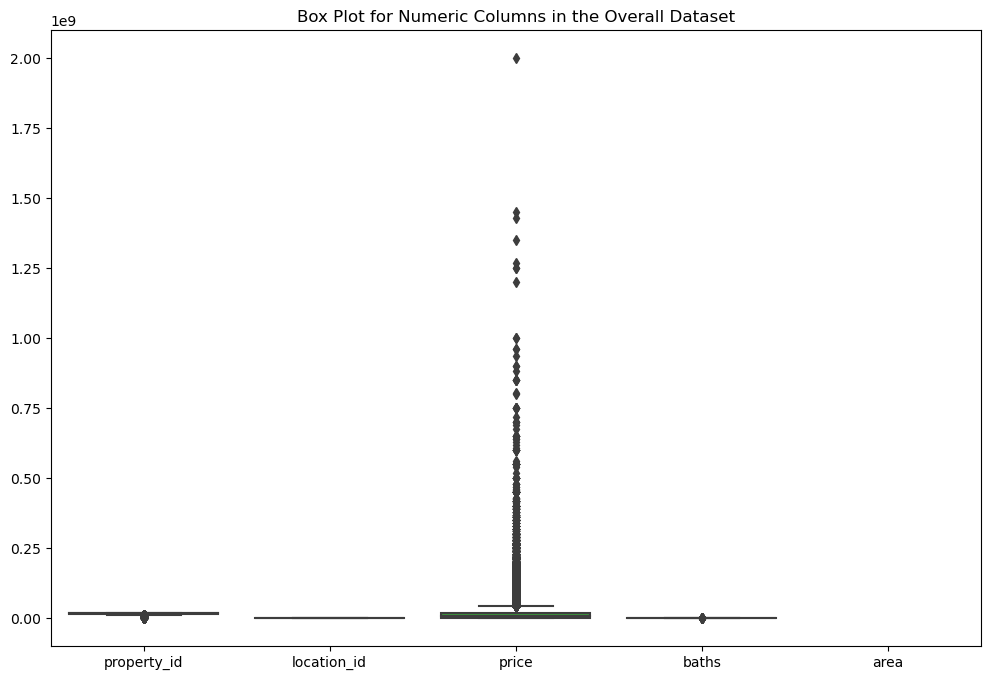

In [12]:

numeric_columns = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns])
plt.title("Box Plot for Numeric Columns in the Overall Dataset")
plt.show()


#Exploratory Data Analysis

C:\Users\ma007\AppData\Local\Temp\ipykernel_10608\3447555005.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5)


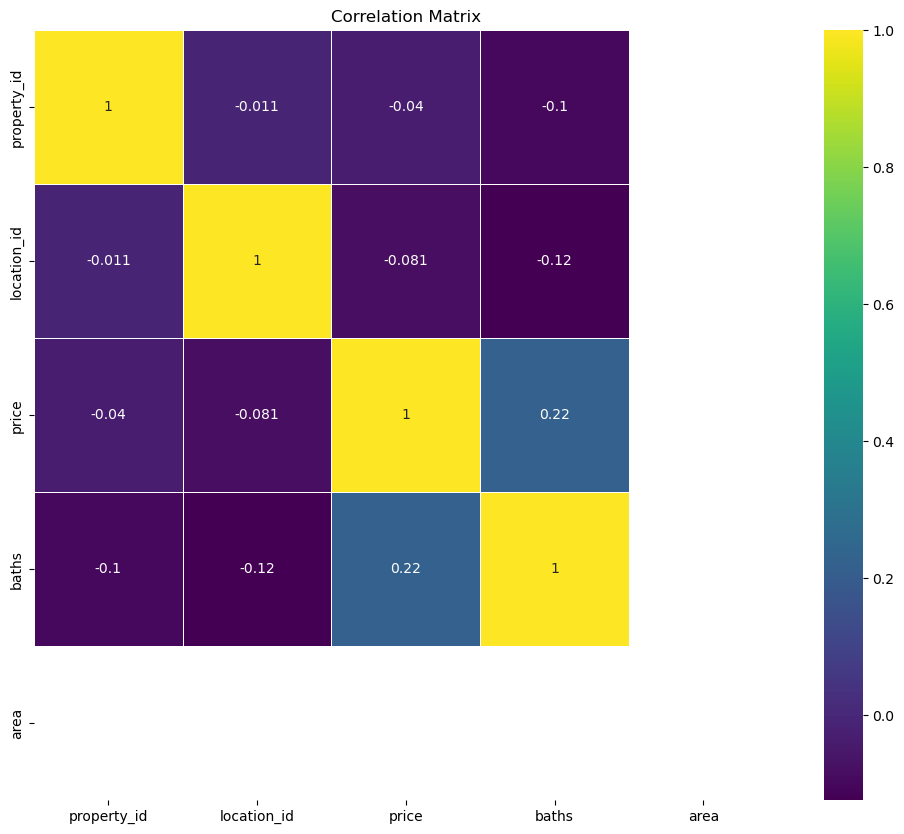

In [10]:

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [13]:

properties_listed = df['price']
price = df['price']
correlation = price.corr(price)
print("Correlation between properties listed and average property price: {:.2f}".format(correlation))


Correlation between properties listed and average property price: 1.00


#Feature Engineering

In [14]:

df['price_per_sqm'] = df['price'] / df['area']
selected_columns = ['property_id', 'location_id', 'property_type', 'price', 'area', 'price_per_sqm']
formatted_df = df[selected_columns]
print(formatted_df)


        property_id  location_id  property_type      price  area  \
0            347795            8          House  220000000   NaN   
1            482892           48          House   40000000   NaN   
2            555962           75          House    9500000   NaN   
3            562843         3821          House  125000000   NaN   
4            686990         3522          House   21000000   NaN   
...             ...          ...            ...        ...   ...   
191388     17468383          174  Upper Portion      70000   NaN   
191389     17468384          174  Upper Portion      40000   NaN   
191390     17468482          167          House     160000   NaN   
191391     17468586          339           Flat      25000   NaN   
191392     17468660         3421  Upper Portion      26000   NaN   

        price_per_sqm  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
191388         

In [15]:

df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['quarter_added'] = df['date_added'].dt.quarter
df['day_of_week_added'] = df['date_added'].dt.dayofweek
print(df[['date_added', 'month_added', 'quarter_added', 'day_of_week_added']].head())


  date_added  month_added  quarter_added  day_of_week_added
0 2019-07-17            7              3                  2
1 2018-10-06           10              4                  5
2 2019-07-03            7              3                  2
3 2019-04-04            4              2                  3
4 2019-04-04            4              2                  3


In [16]:

df['area'].fillna(df['area'].mean(), inplace=True)
numerical_columns = ['price', 'latitude', 'longitude', 'baths', 'area', 'bedrooms']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df[numerical_columns].head())


KeyError: "['latitude', 'longitude', 'bedrooms'] not in index"

In [17]:

unnecessary_columns = ['property_id', 'location_id', 'date_added']
df_cleaned = df.drop(columns=unnecessary_columns)s
df_cleaned[['area', 'price_per_sqm']] = df_cleaned[['area', 'price_per_sqm']].fillna(df_cleaned[['area', 'price_per_sqm']].mean())



#Model Training

In [19]:
data = pd.read_csv("C:\\Users\\ma007\\Downloads\\Q1_property.csv", delimiter=";")

In [20]:

data = data.drop('property_area', axis=1)
data['area_in_kanals'] = data['property_area'] / 20.0


KeyError: "['property_area'] not found in axis"

In [28]:

numerical_columns = df_cleaned.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])


C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\ma007\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [21]:

df_cleaned = pd.get_dummies(df_cleaned, columns=['property_type'], prefix='property_type')


In [22]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']

seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (153114, 15) (153114,)
Testing set shape: (38279, 15) (38279,)


In [31]:


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

assert X_train.shape[0] == y_train.shape[0], "Inconsistent number of samples between X_train and y_train"

categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

string_categorical_cols = [col for col in categorical_cols if X_train[col].dtype == 'O']
numeric_categorical_cols = [col for col in categorical_cols if X_train[col].dtype != 'O']

label_encoder = LabelEncoder()

for col in string_categorical_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

onehot_encoder = OneHotEncoder(sparse_output=False)

X_train_numeric_encoded = onehot_encoder.fit_transform(X_train[numeric_categorical_cols].astype(str))
X_test_numeric_encoded = onehot_encoder.transform(X_test[numeric_categorical_cols].astype(str))

X_train = pd.concat([X_train.drop(columns=numeric_categorical_cols), pd.DataFrame(X_train_numeric_encoded)], axis=1)
X_test = pd.concat([X_test.drop(columns=numeric_categorical_cols), pd.DataFrame(X_test_numeric_encoded)], axis=1)

svm_model = SVR()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
}

grid_search = GridSearchCV(svm_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error on Test Set:", mse)


X_train shape: (189851, 15)
y_train shape: (153114,)


AssertionError: Inconsistent number of samples between X_train and y_train

In [32]:

print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in y_train:", y_train.isnull().sum())

X_train = X_train.dropna()
y_train = y_train.dropna()

print("X_train shape after handling missing values:", X_train.shape)
print("y_train shape after handling missing values:", y_train.shape)

assert X_train.shape[0] == y_train.shape[0], "Inconsistent number of samples between X_train and y_train"


Missing values in X_train: 857283
Missing values in y_train: 0
X_train shape after handling missing values: (0, 15)
y_train shape after handling missing values: (153114,)


AssertionError: Inconsistent number of samples between X_train and y_train

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming y_true contains the true values and y_pred contains the predicted values
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 0.375
Mean Absolute Error (MAE): 0.5
Root Mean Squared Error (RMSE): 0.6123724356957945
Mean Absolute Percentage Error (MAPE): 32.73809523809524
